In [9]:
import warnings
warnings.filterwarnings('ignore')
# Data Wraggling
import numpy as np
import pandas as pd
from numpy import *
# Statistics
from math import sqrt
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv", sep=',')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [37]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
# Checking Missing Values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

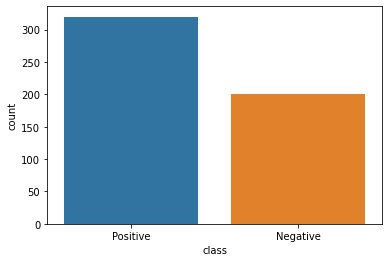

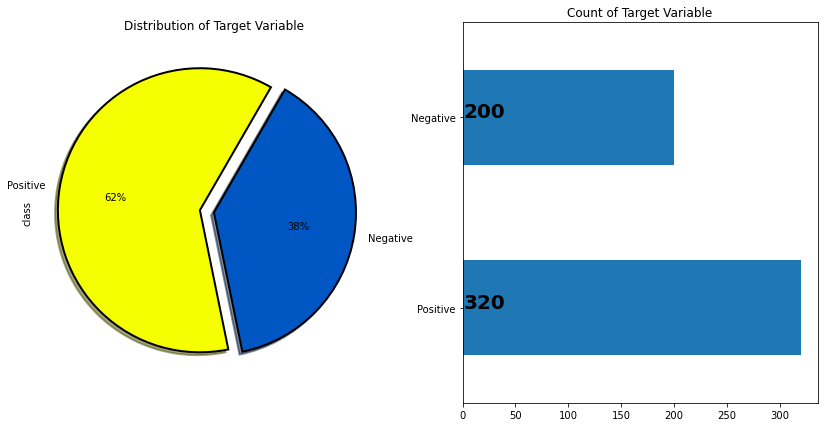

<Figure size 432x288 with 0 Axes>

In [10]:
#Distribution of Target Variable
sns.countplot(df['class'],data=df)

# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette("prism",7), 
                                    startangle = 60, labels=["Positive","Negative"],
                                    wedgeprops={"linewidth":2,"edgecolor":"k"}, explode=[.1,0], shadow =True)
plt.title("Distribution of Target Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()
plt.clf()

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


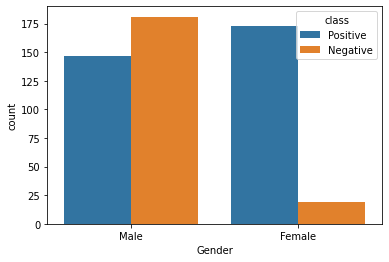

In [11]:
# Distribution of Gender
sns.countplot(df['Gender'], hue=df['class'], data=df)

plot_criteria = ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns')*100,2)).style.background_gradient(cmap=cm)

<Figure size 360x360 with 0 Axes>

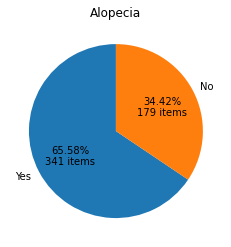

<Figure size 432x288 with 0 Axes>

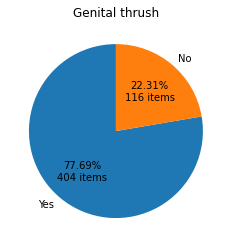

<Figure size 432x288 with 0 Axes>

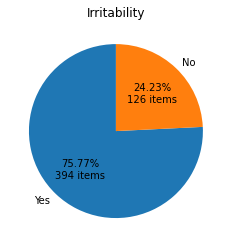

<Figure size 432x288 with 0 Axes>

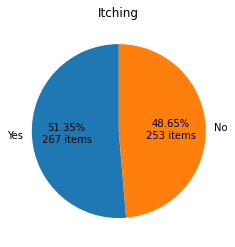

<Figure size 432x288 with 0 Axes>

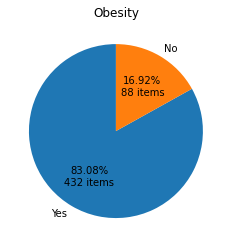

<Figure size 432x288 with 0 Axes>

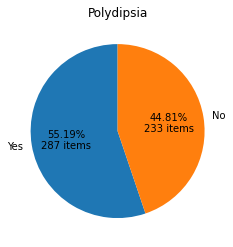

<Figure size 432x288 with 0 Axes>

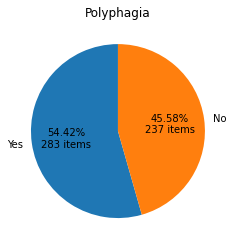

<Figure size 432x288 with 0 Axes>

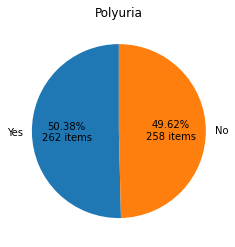

<Figure size 432x288 with 0 Axes>

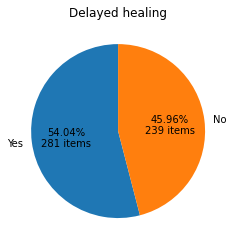

<Figure size 432x288 with 0 Axes>

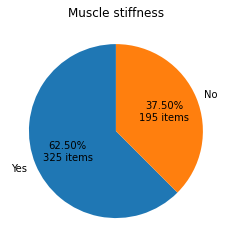

<Figure size 432x288 with 0 Axes>

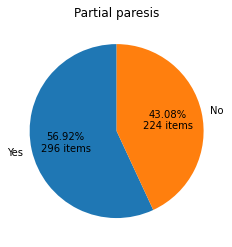

<Figure size 432x288 with 0 Axes>

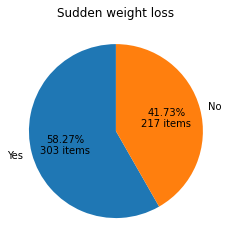

<Figure size 432x288 with 0 Axes>

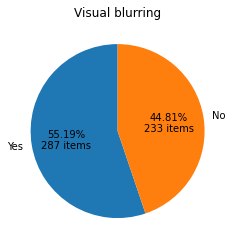

<Figure size 432x288 with 0 Axes>

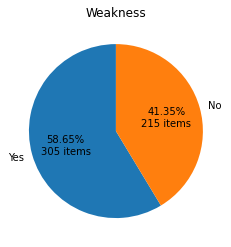

<Figure size 432x288 with 0 Axes>

In [12]:
# Occurences of Symptoms in patients
# Function for Pie Plot
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()
    plt.clf()
    
df_symptoms = df[df.columns.difference(["Age", "class", "Gender"])]
plt.figure(figsize=(5,5))

for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])

In [13]:
# Data Pre-Processing
# Changing Postive to 1 and Negative to 0
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [14]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [15]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [38]:
for feature in objectList:
    print(feature)

Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity


In [16]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [17]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [18]:
# Correlation between features
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

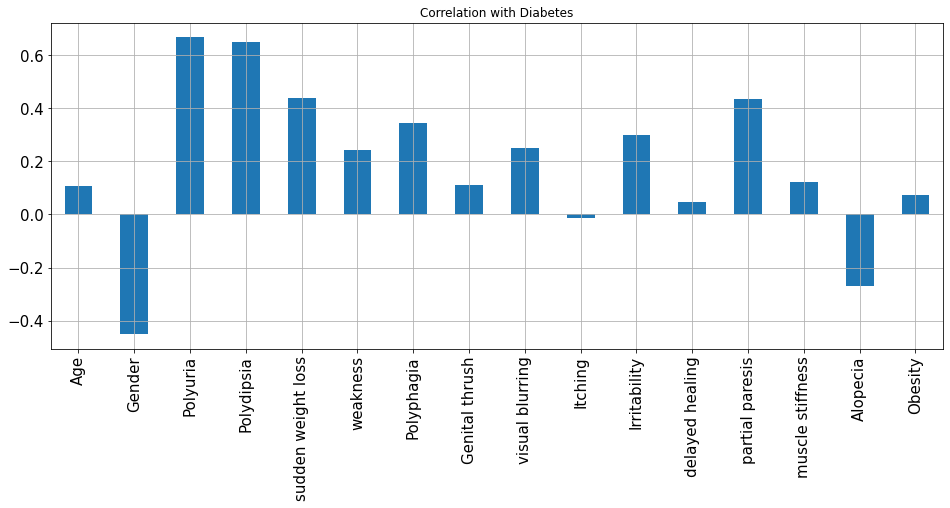

In [19]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
    figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15, 
    rot = 90, grid = True)

In [20]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

<IPython.core.display.Javascript object>

In [21]:
# checking distribution of target variable in train test split

print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    193
0    119
Name: class, dtype: int64
Distribution of target variable in test set
1    127
0     81
Name: class, dtype: int64


In [22]:
# Data Normalization
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])
X_train.head()

<IPython.core.display.Javascript object>

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
93,0.347826,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0
512,0.391304,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
488,0.492754,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0
453,0.173913,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
293,0.536232,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0


In [23]:
# Feature Selection
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [24]:
X_FS = X[['Polyuria', 'Polydipsia','Age', 'Gender', 'partial paresis', 
          'sudden weight loss', 'Irritability', 'delayed healing', 'Alopecia','Itching']]

X_train, X_test, y_train, y_test = train_test_split(X_FS, y, test_size = 0.4, random_state = 0)

<IPython.core.display.Javascript object>

In [25]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

<IPython.core.display.Javascript object>

In [31]:
x_train = X_train.values
x_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
def scipy_models(x_train, x_test, y_train, y_test, type_model, hidden, learn_rate, run_num, problem):

    print(run_num, ' is our exp run')

    tree_depth = 2
 
    if problem == 'classifification':
        if type_model == 0:   # SGD 
            model = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=100, solver='sgd', learning_rate_init=learn_rate)
            
        elif type_model == 1: # https://scikit-learn.org/stable/modules/tree.html (see how tree can be visualised)
            model = DecisionTreeClassifier(random_state=0, max_depth=tree_depth)
            
        elif type_model == 2:
            model = RandomForestClassifier(n_estimators=100, max_depth=tree_depth, random_state=run_num)
            
        elif type_model == 3:
            model = AdaBoostClassifier(n_estimators=100, random_state=run_num)

        elif type_model == 4:
            model = GradientBoostingClassifier(n_estimators=10, random_state=run_num)

    elif problem == 'regression':
        if type_model == 0:   # SGD  
            model = MLPRegressor(hidden_layer_sizes=(hidden*3,), random_state=run_num, max_iter=500, solver='sgd', learning_rate_init=learn_rate) 
        
        elif type_model == 1:  
            model = DecisionTreeRegressor(random_state=0, max_depth=tree_depth)
            
        elif type_model == 2: 
            model = RandomForestRegressor(n_estimators=100, max_depth=tree_depth, random_state=run_num)
            
        elif type_model == 3: 
            model = AdaBoostRegressor(n_estimators=100, random_state=run_num)
            
        elif type_model == 4:
            model = GradientBoostingRegressor(n_estimators=10, random_state=run_num)            
   
    # Train the model using the training sets
    model.fit(x_train, y_train)   

    if type_model == 1:
        r = export_text(model)
        print(r)

    # Make predictions using the testing set
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train) 

    if problem == 'regression':
        perf_test = np.sqrt(mean_squared_error(y_test, y_pred_test)) 
        perf_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 

    if problem == 'classifification': 
        perf_test = accuracy_score(y_pred_test, y_test) 
        perf_train = accuracy_score(y_pred_train, y_train) 
        cm = confusion_matrix(y_pred_test, y_test) 
        #print(cm, 'is confusion matrix')
        #auc = roc_auc_score(y_pred, y_test, average=None) 

    return perf_test #,perf_train

In [35]:
def main(): 

    max_expruns = 5

    SGD_all = np.zeros(max_expruns) 
    forest_all = np.zeros(max_expruns) 
    tree_all = np.zeros(max_expruns) 
    adaboost_all = np.zeros(max_expruns)  

    gb_all = np.zeros(max_expruns)  
 
    learn_rate = 0.01
    hidden = 8

    prob = 'classifification' #  classification  or regression 
    #prob = 'regression' #  classification  or regression 

    # classifcation accurary is reported for classification and RMSE for regression

    print(prob, ' is our problem') 
 
    for run_num in range(0, max_expruns): 

        x_train, x_test, y_train, y_test = read_data(run_num, prob)   
        
        acc_sgd = scipy_models(x_train, x_test, y_train, y_test, 0, hidden, learn_rate, run_num, prob)    # SGD 
        acc_tree = scipy_models(x_train, x_test, y_train, y_test, 1, hidden, learn_rate, run_num, prob)   # Decision Tree
        acc_forest = scipy_models(x_train, x_test, y_train, y_test, 2, hidden, learn_rate, run_num, prob) # Random Forests
        acc_adaboost = scipy_models(x_train, x_test, y_train, y_test, 3, hidden, learn_rate, run_num, prob) # Adaboost
        acc_gb = scipy_models(x_train, x_test, y_train, y_test, 4, hidden, learn_rate, run_num, prob)  # Gradient Boosting
       
        SGD_all[run_num] = acc_sgd 
        tree_all[run_num] = acc_tree
        forest_all[run_num] = acc_forest
        adaboost_all[run_num] = acc_adaboost
        gb_all[run_num] = acc_gb

    print(SGD_all,' nn_all')
    print(np.mean(SGD_all), ' mean nn_all')
    print(np.std(SGD_all), ' std nn_all')
 
    print(tree_all,  ' tree_all')
    print(np.mean(tree_all),  ' tree_all')
    print(np.std(tree_all),  ' tree_all')

    print(forest_all, hidden,' forest_all')
    print(np.mean(forest_all),  ' forest_all')
    print(np.std(forest_all),  ' forest_all')

    print(adaboost_all,  'adaboost_all')
    print(np.mean(adaboost_all),  ' adaboost_all')
    print(np.std(adaboost_all),  ' adaboost_all')
       
    print(gb_all,  'gb_all')
    print(np.mean(gb_all),  ' gb_all')
    print(np.std(gb_all),  ' gball')
    
    
if __name__ == '__main__':
     main() 

classifification  is our problem
0  is our exp run
0  is our exp run
|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.80
|   |   |--- class: 1
|   |--- feature_2 >  0.80
|   |   |--- class: 0

0  is our exp run
0  is our exp run
0  is our exp run
1  is our exp run
1  is our exp run
|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.80
|   |   |--- class: 1
|   |--- feature_2 >  0.80
|   |   |--- class: 0

1  is our exp run
1  is our exp run
1  is our exp run
2  is our exp run
2  is our exp run
|--- feature_0 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.80
|   |   |--- class: 1
|   |--- feature_2 >  0.80
|   |   |--- class: 0

2  is our exp run
2  i

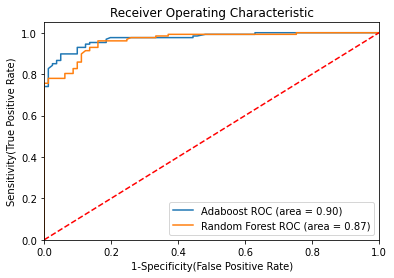

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Adaboost',
    'model': AdaBoostClassifier(n_estimators=100, random_state=0),
},

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
},

]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.clf()